In [1]:
from IPython.display import HTML, display

import statsmodels.api as sm
from statsmodels.formula.api import ols

from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings(action="ignore")

df = pd.read_csv('CC GENERAL.csv')

In [2]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
#Exploring data
print(df.dtypes)
print(df.shape)
#8950 instance and 18 columns

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object
(8950, 18)


In [4]:
# Dropped CUST_ID from DF because it doesn't contribute to prediction models and clustering
df= df.drop('CUST_ID', axis = 1)

In [5]:
df.describe()
#Target variable balance has a mean of 1564 
#Frequency columns values range between 0 and 1
#Min and max values points to an outlier problem in data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [6]:
#Null check
print(df.isnull().sum().sort_values(ascending=False).head(18))

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
TENURE                                0
PURCHASES_FREQUENCY                   0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_INSTALLMENTS_FREQUENCY      0
ONEOFF_PURCHASES_FREQUENCY            0
PRC_FULL_PAYMENT                      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
PAYMENTS                              0
BALANCE                               0
dtype: int64


In [7]:
#Null value handling
#In most of the null 313 cases, payments column is equal to 0
#Minimum payment value must also be equal to zero if there is no payment done 
df.loc[(df['PAYMENTS']==0),'MINIMUM_PAYMENTS']=0 
df.loc[(df['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS']=df['MINIMUM_PAYMENTS'].mean()
df.loc[(df['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT']=df['CREDIT_LIMIT'].mean()
print(df.isnull().sum().sort_values(ascending=False).head(18))

TENURE                              0
ONEOFF_PURCHASES_FREQUENCY          0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
PURCHASES_INSTALLMENTS_FREQUENCY    0
PRC_FULL_PAYMENT                    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
BALANCE                             0
dtype: int64


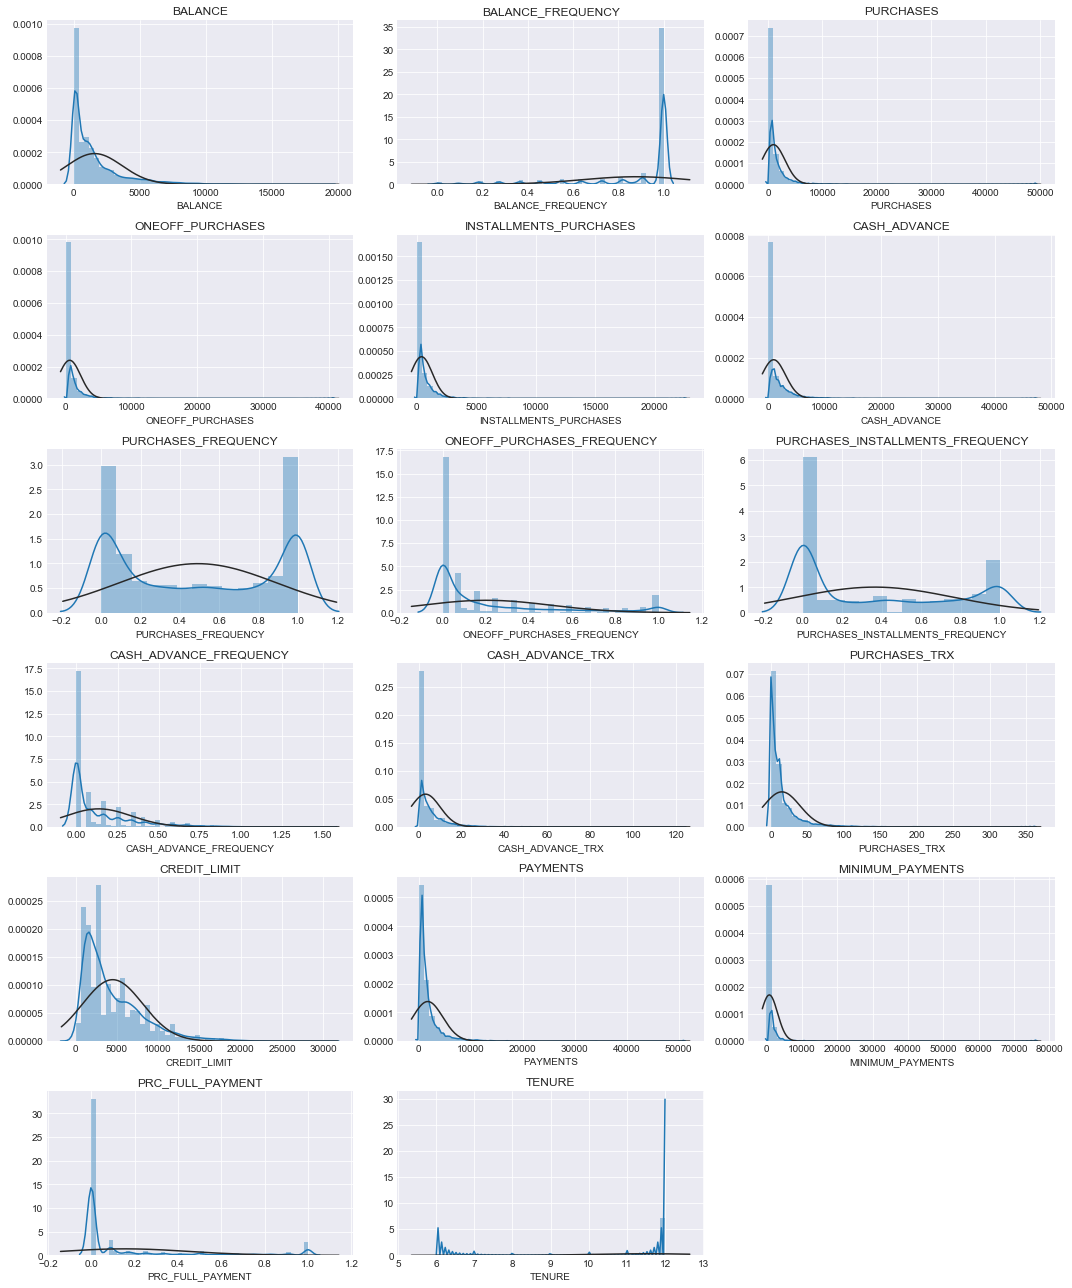

In [8]:
#Visualisation and feature exploring
from scipy.stats import norm 

graph_by_variables = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']
plt.figure(figsize=(15,18))

for i in range(0,17):
    plt.subplot(6,3,i+1)
    sns.distplot(df[graph_by_variables[i]].dropna(),fit=norm)
    plt.title(graph_by_variables[i])

plt.tight_layout()

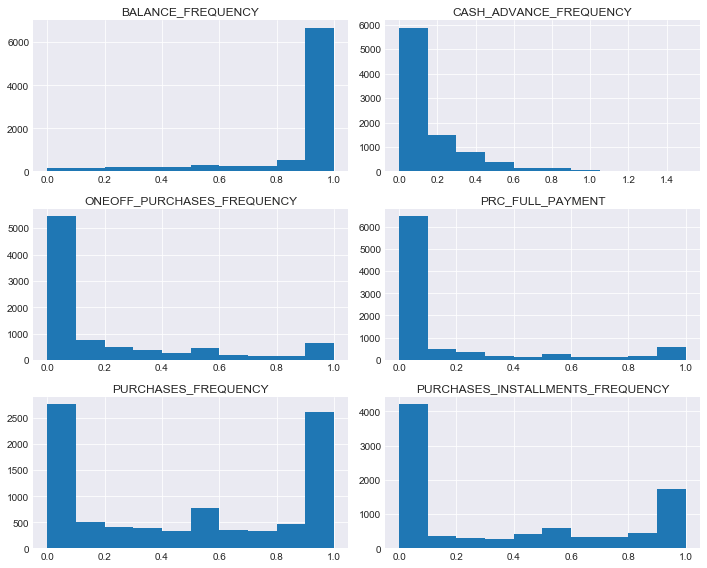

In [9]:
#Histograms of frequency variables 

df[['BALANCE_FREQUENCY',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
'PRC_FULL_PAYMENT']].hist(figsize=(10,8))
plt.tight_layout()

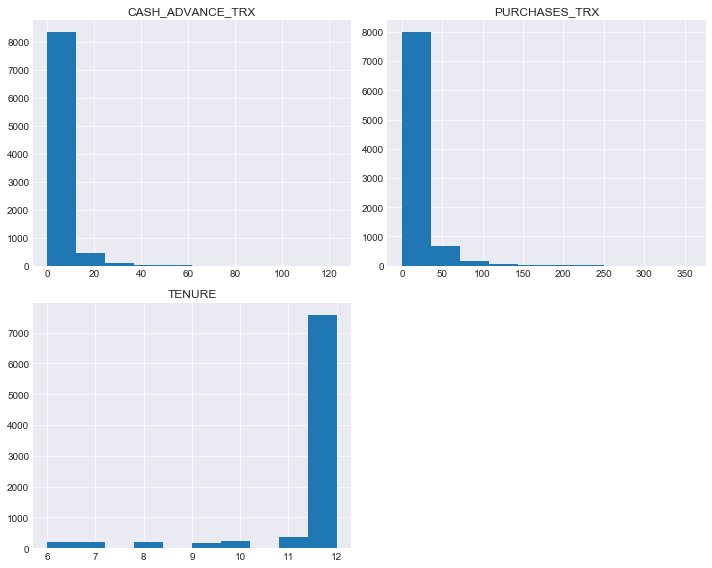

In [10]:
#Histograms of int variables 

df[['TENURE','CASH_ADVANCE_TRX', 'PURCHASES_TRX']].hist(figsize=(10,8))
plt.tight_layout()

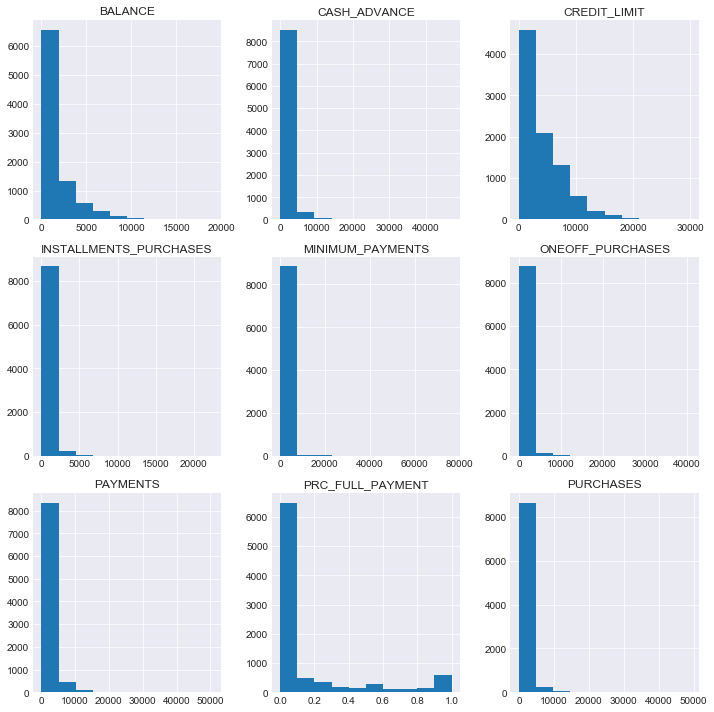

In [11]:
#Histogram of other variables

df[['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
    'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']].hist(figsize=(10,10))

plt.tight_layout()

Text(0.5,1,'Correlation Matrix')

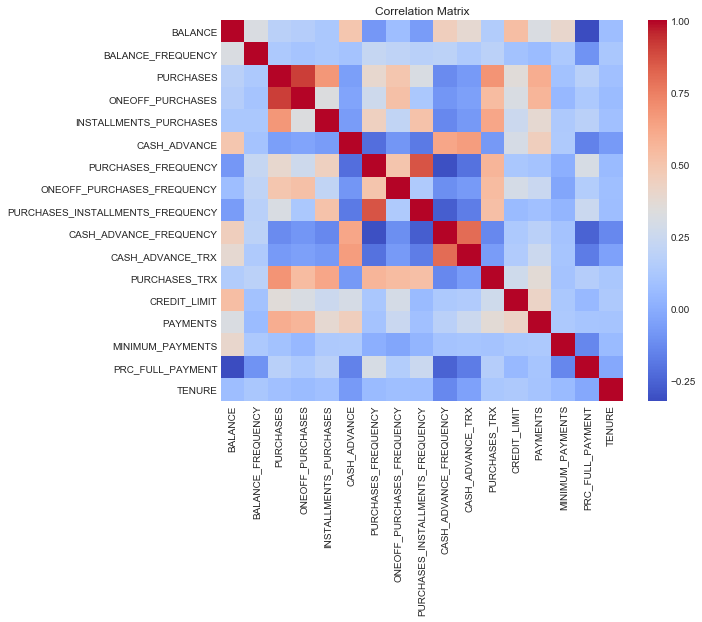

In [12]:
#Correlations between features
plt.figure(figsize=(9,7))
sns.heatmap(df.corr(),cmap='coolwarm')

plt.title('Correlation Matrix')
#Purchases has a high level of correlation with Oneoff_purchases and installment_purchases (it is actually total of them) 
#Purchases also has a high level of correlation with Purchases_trx
#Cash advance has a high level of correlation with Cash_advance_frequency and Cash_advance_trx
#Purchases_frequency has a high level of correlation with Purchases_installments_frequency
#Cash advance frequency has a high level of correlation with Cash_advance_trx

#It is clear that frequencies and transaction numbers are correlated with real values of events 

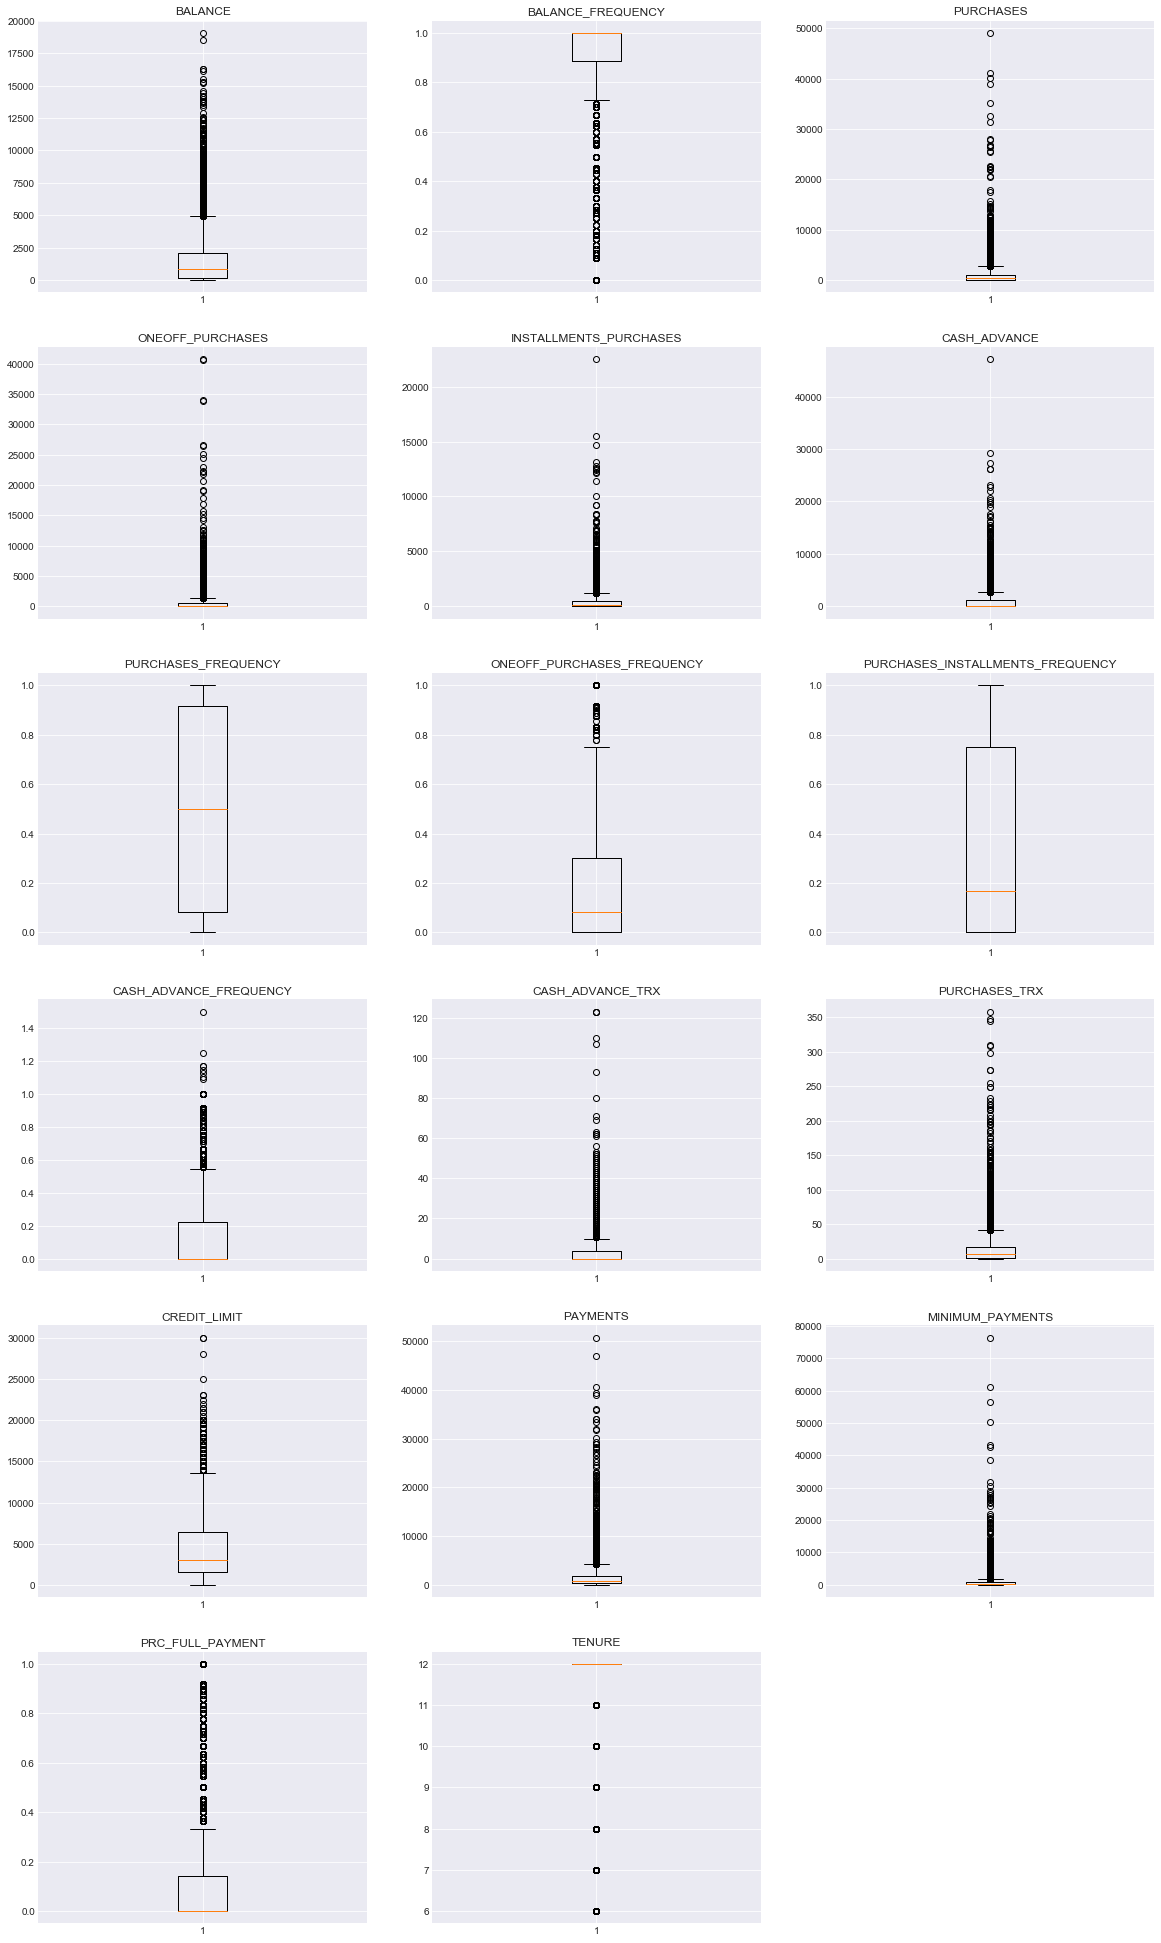

In [13]:
#There are too many outliers in data
plt.figure(figsize=(20,35))

for i in range(0,17):
    plt.subplot(6, 3, i+1)
    plt.boxplot(df[graph_by_variables[i]].dropna())
    plt.title(graph_by_variables[i])

In [14]:
#Model 1 - OLS with Kitchen sink model

x = df.iloc[:, df.columns != 'BALANCE']
y = df.iloc[:, df.columns == 'BALANCE']

from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.25, shuffle=False)

X_train = sm.add_constant(x_train) ## let's add an intercept (beta_0) to our model
X_test = sm.add_constant(x_test) 

#MODEL 1
lm1 = sm.OLS(y_train,X_train).fit()

print(lm1.summary())
#There is a multicolinearity indicator in results 

y_test1=y_test
y_pred1 = lm1.predict(X_test) 
from sklearn import metrics

print(metrics.mean_absolute_error(y_test1, y_pred1))
print(metrics.mean_squared_error(y_test1, y_pred1))
print(np.sqrt(metrics.mean_squared_error(y_test1, y_pred1)))

                            OLS Regression Results                            
Dep. Variable:                BALANCE   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     684.4
Date:                Thu, 21 Jan 2021   Prob (F-statistic):               0.00
Time:                        21:33:51   Log-Likelihood:                -58076.
No. Observations:                6712   AIC:                         1.162e+05
Df Residuals:                    6695   BIC:                         1.163e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [15]:
#Model 2 - Removed outliers with studentized residuals higher than 3

influence = lm1.get_influence()  
resid_student = influence.resid_studentized_external

resid = pd.concat([x_train,pd.Series(resid_student,name = "Studentized Residuals")],axis = 1)

#remove studentized residuals > 3
resid.loc[np.absolute(resid["Studentized Residuals"]) > 3,:]

#get index values
ind = resid.loc[np.absolute(resid["Studentized Residuals"]) > 3,:].index

#remove from data
y_train.drop(ind,axis = 0,inplace = True)
x_train.drop(ind,axis = 0,inplace = True)  #Intercept column is not there
X_train.drop(ind,axis = 0,inplace = True)  #Intercept column is there

lm2 = sm.OLS(y_train,X_train).fit()

print(lm2.summary())
#Again there is multicolinearity indicator but R^2 increased

y_test2=y_test
y_pred2 = lm2.predict(X_test) 

print(metrics.mean_absolute_error(y_test2, y_pred2))
print(metrics.mean_squared_error(y_test2, y_pred2))
print(np.sqrt(metrics.mean_squared_error(y_test2, y_pred2)))

                            OLS Regression Results                            
Dep. Variable:                BALANCE   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     773.8
Date:                Thu, 21 Jan 2021   Prob (F-statistic):               0.00
Time:                        21:34:18   Log-Likelihood:                -56192.
No. Observations:                6618   AIC:                         1.124e+05
Df Residuals:                    6601   BIC:                         1.125e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [16]:
#Multicolinearity handling
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(x):
    thresh = 5.0
    output = pd.DataFrame()
    k = x.shape[1]
    vif = [variance_inflation_factor(x.values, j) for j in range(x.shape[1])]
    for i in range(1,k):
        print("Iteration no.")
        print(i)
        print(vif)
        a = np.argmax(vif)
        print("Max VIF is for variable no.:")
        print(a)
        if vif[a] <= thresh :
            break
        if i == 1 :          
            output = x.drop(x.columns[a], axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
        elif i > 1 :
            output = output.drop(output.columns[a],axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
    return(output)



train_out = calculate_vif(x_train) 

print(train_out.head())

Iteration no.
1
[19.918944471817913, 158594.1411856075, 89401.43126268848, 26575.435980252885, 3.438714083624664, 24.170170929510935, 6.073695530827189, 14.590207434861629, 4.901957519364043, 4.025092890180345, 4.269165408617801, 3.914715644617033, 3.7613194106761543, 1.3579848267047194, 1.5439123695541381, 18.907142421787764]
Max VIF is for variable no.:
1
Iteration no.
2
[19.912441913218064, 2.786384502455548, 2.493603788554119, 3.4384325041305854, 24.165058001503002, 6.070952259417405, 14.590178936415828, 4.901359728448638, 4.024988435798292, 4.26865083419239, 3.9146508259522452, 3.761199395944658, 1.3579539184799585, 1.543687878611169, 18.899081441387423]
Max VIF is for variable no.:
4
Iteration no.
3
[19.664179135602172, 2.7860951700980587, 2.491384127810376, 3.436617081413889, 2.7982576102383505, 3.2358135558347727, 4.834095058027451, 4.02125347392564, 4.082357623474735, 3.9094252365410527, 3.752665695882913, 1.3544412843548945, 1.5157445187980891, 18.775559441872712]
Max VIF is 

In [17]:
#Model 3 - Removed columns that leads to multicolinearity

x_test.drop(["BALANCE_FREQUENCY","PURCHASES","PURCHASES_FREQUENCY"],axis = 1,inplace = True)

Train_out = sm.add_constant(train_out) ## let's add an intercept (beta_0) to our model
X_test = sm.add_constant(x_test)
lm3 = sm.OLS(y_train,Train_out).fit()
print(lm3.summary())
#Again there is multicolinearity indicator

y_test3=y_test
y_pred3 = lm3.predict(X_test) 
print(metrics.mean_absolute_error(y_test3, y_pred3))
print(metrics.mean_squared_error(y_test3, y_pred3))
print(np.sqrt(metrics.mean_squared_error(y_test3, y_pred3)))

                            OLS Regression Results                            
Dep. Variable:                BALANCE   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     840.8
Date:                Thu, 21 Jan 2021   Prob (F-statistic):               0.00
Time:                        21:34:18   Log-Likelihood:                -56456.
No. Observations:                6618   AIC:                         1.129e+05
Df Residuals:                    6604   BIC:                         1.130e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [18]:
#Vif score check: all vif scores are lower then 5
[print(variance_inflation_factor(train_out.values, j)) for j in range(train_out.shape[1])]

2.7742057885372815
2.4873020876595175
3.4269289651059576
2.6910304792685737
3.115382703705153
4.56581895657638
3.995377527526014
4.076224863160818
3.902306408914573
3.7060135931454723
1.3393893981486535
1.5067409269527436
4.6288055136316215


[None, None, None, None, None, None, None, None, None, None, None, None, None]

In [19]:
#Model 4 - Removed outliers based on z-scores
print(df.shape)
z = np.abs(stats.zscore(df))
print(z)
threshold = 3
df1 = df[(z < 3).all(axis=1)]
print(df1.shape)
#Instances decreased from 8950 to 7434

x = df1.iloc[:, df1.columns != 'BALANCE']
y = df1.iloc[:, df1.columns == 'BALANCE']

from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.25, shuffle=False)

X_train = sm.add_constant(x_train) ## let's add an intercept (beta_0) to our model
X_test = sm.add_constant(x_test) 


lm4 = sm.OLS(y_train,X_train).fit()

print(lm4.summary())
#There is a multicolinearity indicator in results 

y_test4=y_test
y_pred4 = lm4.predict(X_test) 
from sklearn import metrics

print(metrics.mean_absolute_error(y_test4, y_pred4))
print(metrics.mean_squared_error(y_test4, y_pred4))
print(np.sqrt(metrics.mean_squared_error(y_test4, y_pred4)))

(8950, 17)
[[0.73198937 0.24943448 0.42489974 ... 0.30040327 0.52555097 0.36067954]
 [0.78696085 0.13432467 0.46955188 ... 0.09915834 0.2342269  0.36067954]
 [0.44713513 0.51808382 0.10766823 ... 0.09147338 0.52555097 0.36067954]
 ...
 [0.7403981  0.18547673 0.40196519 ... 0.32485738 0.32919999 4.12276757]
 [0.74517423 0.18547673 0.46955188 ... 0.3362779  0.32919999 4.12276757]
 [0.57257511 0.88903307 0.04214581 ... 0.32234282 0.52555097 4.12276757]]
(7434, 17)
                            OLS Regression Results                            
Dep. Variable:                BALANCE   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     695.3
Date:                Thu, 21 Jan 2021   Prob (F-statistic):               0.00
Time:                        21:34:18   Log-Likelihood:                -46037.
No. Observations:                5575   AIC:                

In [20]:
#Model 5 - This time i applied standard scaler and PCA to avoid multicolinearity

#I am using the data without outliers

x = df1.iloc[:, df1.columns != 'BALANCE']
y = df1.iloc[:, df1.columns == 'BALANCE']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, shuffle=False)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(x_train)
# Apply transform to both the training set and the test set.
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)

pca.fit(x_train)

x_train = pca.transform(x_train)
x_test = pca.transform(x_test)

X_train = sm.add_constant(x_train) ## let's add an intercept (beta_0) to our model
X_test = sm.add_constant(x_test) 

lm5 = sm.OLS(y_train,X_train).fit()

print(lm5.summary())

y_test5=y_test
y_pred5 = lm5.predict(X_test) 

print(metrics.mean_absolute_error(y_test5, y_pred5))
print(metrics.mean_squared_error(y_test5, y_pred5))
print(np.sqrt(metrics.mean_squared_error(y_test5, y_pred5)))

                            OLS Regression Results                            
Dep. Variable:                BALANCE   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     981.0
Date:                Thu, 21 Jan 2021   Prob (F-statistic):               0.00
Time:                        21:34:18   Log-Likelihood:                -46095.
No. Observations:                5575   AIC:                         9.221e+04
Df Residuals:                    5563   BIC:                         9.229e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1444.4511     12.645    114.229      0.0

In [21]:
#Model comparisons based on OLS MSE values on test data
print("Kitchen Sink Model MSE:", metrics.mean_squared_error(y_test1, y_pred1))
#print("Model without outliers based on studentized t MSE:", metrics.mean_squared_error(y_test2, y_pred2))
print("Model excluding columns with high VIF scores MSE:", metrics.mean_squared_error(y_test3, y_pred3))
print("Model without outliers based on z MSE:", metrics.mean_squared_error(y_test4, y_pred4))
print("Model with scaled data and PCA MSE:", metrics.mean_squared_error(y_test5, y_pred5))

#Minimum value of MSE resulted with a score of 553775 
#minimum MSE score belongs to the model without outliers that has z-scores higher than 3 as expected 
#because there were too many outliers in data

#But multicolinearity handling did not result with lower values of MSE so i will not drop any column

Kitchen Sink Model MSE: 850348.1927134867
Model excluding columns with high VIF scores MSE: 884982.4398395182
Model without outliers based on z MSE: 553775.6034643012
Model with scaled data and PCA MSE: 562222.2615971941


In [22]:
#CLUSTERING PART
df1.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [23]:
df1.shape

(7434, 17)

In [24]:
#Fit and transform data with min max scaler
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(df1)
df_transformed = mms.transform(df1)
df_transformed

array([[0.00524147, 0.77777805, 0.01302677, ..., 0.017928  , 0.        ,
        1.        ],
       [0.41041102, 0.88888902, 0.        , ..., 0.13780333, 0.222222  ,
        1.        ],
       [0.31976484, 1.        , 0.10557557, ..., 0.08061055, 0.        ,
        1.        ],
       ...,
       [0.11140833, 0.69444451, 0.        , ..., 0.04343372, 0.        ,
        0.        ],
       [0.0176525 , 1.        , 0.0602181 , ..., 0.01601711, 0.        ,
        0.        ],
       [0.04242803, 0.69444451, 0.01108778, ..., 0.02635238, 0.        ,
        0.        ]])

In [25]:
Sum_of_squared_distances=[]
cluster_range = range(1,15)
for i in cluster_range:
    clusters=KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    clusters.fit(df_transformed)
    labels=clusters.labels_
    centroids=clusters.cluster_centers_,3
    Sum_of_squared_distances.append(clusters.inertia_)
clusters_df=pd.DataFrame({'num_clusters':cluster_range,'Sum_of_squared_distances':Sum_of_squared_distances})
clusters_df

,num_clusters,Sum_of_squared_distances
0,1,6648.240440
1,2,4469.299333
2,3,3889.398597
3,4,3419.596187
4,5,3113.432980
5,6,2875.553411
6,7,2662.750696
7,8,2536.587836
8,9,2424.350241
9,10,2313.066938


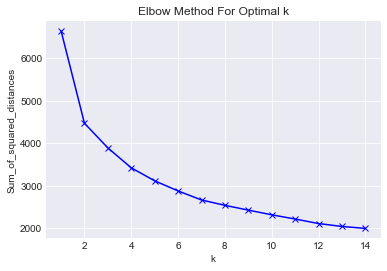

In [26]:
plt.plot(cluster_range, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()
#I will take 4 as the elbow point and create 4 cluster groups

In [27]:
from sklearn.metrics import silhouette_samples, silhouette_score

km = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0).fit(df_transformed)
silhouette_avg = silhouette_score(df_transformed, km.labels_)
print(km.labels_)
print(silhouette_avg)

[3 3 2 ... 3 1 3]
0.2589690106194354


In [28]:
#The number of parameters is set to 2 using the n_clusters parameter while the affinity is set to "euclidean" (distance between the datapoints). Finally linkage parameter is set to "ward", which minimizes the variant between the clusters.
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
cluster.fit_predict(df_transformed)
print(cluster.labels_)
silhouette_avg2 = silhouette_score(df_transformed, cluster.labels_)
print(silhouette_avg2)

[2 0 3 ... 0 1 0]
0.2082056011389866


In [29]:
#K means has a higher value of silhouette score so i will seperate data into clusters based on k means result
df1["Cluster"] = km.labels_+1

In [30]:
df1.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,4
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,4
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,4
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,2
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12,2
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12,4
9,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12,1
10,1293.124939,1.000000,920.12,0.00,920.12,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,1200.0,1083.301007,2172.697765,0.000000,12,2


In [31]:
df1.groupby('Cluster').mean() # for every column

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Cluster,,,,,,,,,,,,,,,,,
1,136.090098,0.456330,378.411670,243.035310,135.627089,300.835949,0.248999,0.085980,0.153910,0.033721,0.706204,4.143248,3578.204075,986.740107,164.673635,0.267217,11.663321
2,894.418737,0.948204,890.048467,193.695976,696.893048,296.925407,0.884180,0.090575,0.837508,0.051835,1.085967,19.127788,3537.507510,1114.972140,577.058291,0.229865,11.758364
3,1408.863855,0.973545,2200.610334,1675.573909,525.036424,389.790986,0.882821,0.764756,0.452451,0.064996,1.377246,31.198460,5797.569795,2184.346230,543.057753,0.254972,11.866553
4,1895.599524,0.972781,230.719715,186.992711,43.902542,1183.614467,0.133695,0.081781,0.052271,0.195842,4.138217,2.473649,3785.621880,1197.121358,730.444718,0.021037,11.732184


In [33]:
# Principal Component Analysis for Visualization of Clusters
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_transformed)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head(2)

,principal component 1,principal component 2
0,-0.455622,-0.320341
1,-0.729780,0.339358


In [34]:
finalDf = pd.concat([principalDf, pd.DataFrame({'cluster':km.labels_+1})], axis = 1)
finalDf.head()

,principal component 1,principal component 2,cluster
0,-0.455622,-0.320341,4
1,-0.729780,0.339358,4
2,0.303639,0.469574,3
3,-0.535305,-0.096013,1
4,-0.533237,-0.148646,4


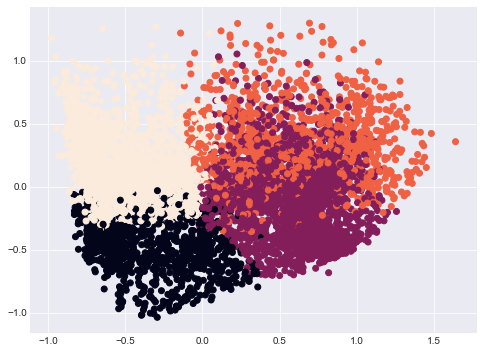

In [35]:
plt.figure(figsize=(8,6))
ax = plt.scatter(x="principal component 1", y="principal component 2", c="cluster", data=finalDf)
plt.show()

In [45]:
df_c1 = df1[df1["Cluster"] == 1]

x = df_c1.iloc[:, df_c1.columns != 'BALANCE']
y = df_c1.iloc[:, df_c1.columns == 'BALANCE']


from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.25, shuffle=False)

X_train = sm.add_constant(x_train) ## let's add an intercept (beta_0) to our model
X_test = sm.add_constant(x_test) 

#MODEL 
lm1 = sm.OLS(y_train,X_train).fit()

print(lm1.summary())
#There is a multicolinearity indicator in results 

y_test1=y_test
y_pred1 = lm1.predict(X_test) 

print(metrics.mean_absolute_error(y_test1, y_pred1))
print(metrics.mean_squared_error(y_test1, y_pred1))
print(np.sqrt(metrics.mean_squared_error(y_test1, y_pred1)))

                            OLS Regression Results                            
Dep. Variable:                BALANCE   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     71.45
Date:                Thu, 21 Jan 2021   Prob (F-statistic):          2.87e-142
Time:                        22:10:07   Log-Likelihood:                -5408.4
No. Observations:                 822   AIC:                         1.085e+04
Df Residuals:                     805   BIC:                         1.093e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
BALANCE_

In [46]:
df_c2 = df1[df1["Cluster"] == 2]

df_c2.head()

x = df_c2.iloc[:, df_c2.columns != 'BALANCE']
y = df_c2.iloc[:, df_c2.columns == 'BALANCE']

from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.25, shuffle=False)

X_train = sm.add_constant(x_train) ## let's add an intercept (beta_0) to our model
X_test = sm.add_constant(x_test) 

#MODEL 
lm2 = sm.OLS(y_train,X_train).fit()

print(lm2.summary())
#There is a multicolinearity indicator in results 

y_test2=y_test
y_pred2 = lm2.predict(X_test) 

print(metrics.mean_absolute_error(y_test2, y_pred2))
print(metrics.mean_squared_error(y_test2, y_pred2))
print(np.sqrt(metrics.mean_squared_error(y_test2, y_pred2)))

                            OLS Regression Results                            
Dep. Variable:                BALANCE   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     185.9
Date:                Thu, 21 Jan 2021   Prob (F-statistic):               0.00
Time:                        22:10:24   Log-Likelihood:                -13094.
No. Observations:                1614   AIC:                         2.622e+04
Df Residuals:                    1597   BIC:                         2.631e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
BALANCE_

In [47]:
df_c3 = df1[df1["Cluster"] == 3]

df_c3.head()

x = df_c3.iloc[:, df_c3.columns != 'BALANCE']
y = df_c3.iloc[:, df_c3.columns == 'BALANCE']

from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.25, shuffle=False)

X_train = sm.add_constant(x_train) ## let's add an intercept (beta_0) to our model
X_test = sm.add_constant(x_test) 

#MODEL 
lm3 = sm.OLS(y_train,X_train).fit()

print(lm3.summary())
#There is a multicolinearity indicator in results 

y_test3=y_test
y_pred3 = lm3.predict(X_test) 

print(metrics.mean_absolute_error(y_test3, y_pred3))
print(metrics.mean_squared_error(y_test3, y_pred3))
print(np.sqrt(metrics.mean_squared_error(y_test3, y_pred3)))

                            OLS Regression Results                            
Dep. Variable:                BALANCE   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     137.2
Date:                Thu, 21 Jan 2021   Prob (F-statistic):          5.61e-216
Time:                        22:10:48   Log-Likelihood:                -7204.2
No. Observations:                 876   AIC:                         1.444e+04
Df Residuals:                     860   BIC:                         1.452e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
BALANCE_

In [48]:
df_c4 = df1[df1["Cluster"] == 4]

df_c4.head()

x = df_c4.iloc[:, df_c4.columns != 'BALANCE']
y = df_c4.iloc[:, df_c4.columns == 'BALANCE']

from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.25, shuffle=False)

X_train = sm.add_constant(x_train) ## let's add an intercept (beta_0) to our model
X_test = sm.add_constant(x_test) 

#MODEL 
lm4 = sm.OLS(y_train,X_train).fit()

print(lm4.summary())
#There is a multicolinearity indicator in results 

y_test4=y_test
y_pred4 = lm4.predict(X_test) 

print(metrics.mean_absolute_error(y_test4, y_pred4))
print(metrics.mean_squared_error(y_test4, y_pred4))
print(np.sqrt(metrics.mean_squared_error(y_test4, y_pred4)))

                            OLS Regression Results                            
Dep. Variable:                BALANCE   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     265.4
Date:                Thu, 21 Jan 2021   Prob (F-statistic):               0.00
Time:                        22:11:03   Log-Likelihood:                -18810.
No. Observations:                2262   AIC:                         3.765e+04
Df Residuals:                    2245   BIC:                         3.775e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
BALANCE_

In [49]:
MSE1 = metrics.mean_squared_error(y_test1, y_pred1)
MSE2 = metrics.mean_squared_error(y_test2, y_pred2)
MSE3 = metrics.mean_squared_error(y_test3, y_pred3)
MSE4 = metrics.mean_squared_error(y_test4, y_pred4)

MSE= (MSE1+MSE2+MSE3+MSE4) / 4
print(MSE1)
print(MSE2)
print(MSE3)
print(MSE4)
print(MSE)
#Mean of MSE scores from 4 cluster regression models resulted as 378388. 
#But cluster 3 and cluster 4's regression models resulted with MSE scores that are higher than regression model i constructed before clustering (553775)

14323.964694447051
374593.1048554367
560166.7186997944
564468.9468600706
378388.1837774372
